- **Author:** Aisling Towey
- **Date:** 10th March 2022

# Overview

### Speech Recognition & Wav2Vec

Speech Recognition involves a machine listening to speech and outputting what it recognises. Wav2Vec 2.0 is model developed by Facebook AI that can be used to transcribe speech as text. See paper here: https://arxiv.org/pdf/2006.11477.pdf.

The Wav2Vec 2.0 model learns speech representations from digital audio signal and then fine tunes on transcribed speech to achieve state of the art results in the area of converting speech to text. A multilayer covolutional neural network (CNN) is used to process the raw waveform of audio and create latent audio representations. These representations are then fed into a quantizer which chooses a speech unit for the latent audio representation from an inventory of learned units. Around half of the audio representations are then masked and passed through a transformer architecture where the aim of the model is to predict the correct speech unit for the masked parts of the audio. This is referred to as self supervised learning. Self supervised learning means labelled data is not available but the model is learned through tasks created by humans which in this case is the masking of parts of the audio for prediction. The model is finally fine tuned on transcribed text.

According to Facebook AI, "with just 10 minutes of transcribed speech and 53K hours of unlabeled speech, wav2vec 2.0 enables speech recognition models at a word error rate (WER) of 8.6 percent on noisy speech and 5.2 percent on clean speech on the standard LibriSpeech benchmark. This opens the door for speech recognition models in many more languages, dialects, and domains that previously required much more transcribed audio data to provide acceptable accuracy".

### Signals and Sampling

All sounds are analog signals. Analog recordings consist of a continuous wave of analog signals/sound. Digital recordings take analog signal but convert the signal to a series of time separated numbers that can be analysed by software.

The process of converting analog signals into digital signals that have discrete time separated data points is called sampling. The rate data points are taken from the analog signal is called the sample rate. For example a sample rate of 22050 means that 22050 data points are taken from the audio every second.

### Analysis Introduction

We are going to test the Wav2Vec 2.0 model on a news clip announcing the death of Elvis Presley which is available to download online at: https://www.wavsource.com/snds_2020-10-01_3728627494378403/news/elvis_died.wav

# Install Packages and Import Modules

In [2]:
# !pip install librosa
# !pip install torch
# !pip install transformers

In [23]:
import librosa
import librosa.display
import torch
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer
import IPython.display as display

# Load Audio and Explore

In [5]:
# let's first play our audio file
speech_wav_file = "elvis_died.wav"
display.Audio(speech_wav_file, autoplay=False)

In [14]:
# now we can load the audio file using the librosa package
# the sample rate needs to be the same sample rate our pretrained model was trained on (16Khz / 16000)
audio, sample_rate = librosa.load(speech_wav_file, sr = 16000)

In [15]:
# we can confirm the sample rate is 16000 by dividing the length of the audio datapoints by the sample rate to see 
# if it matches the number of seconds in our audio in the display above
print(f'Audio should be {round(len(audio)/sample_rate, 2)} seconds long.')

Audio should be 12.29 seconds long.


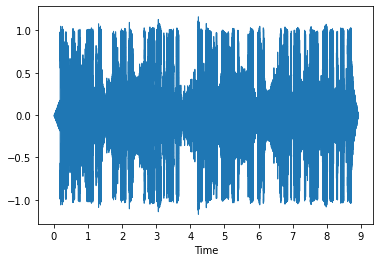

In [16]:
# audio can be represented as waves, let's plot the wave of our audio 
librosa.display.waveshow(audio)

# Load Tokenizer and Model

In [28]:
# Instantiate our tokenizer and model
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Tokenize Audio and Get Transcript Prediction

In [29]:
# tokenize our sampled audio
tokenized_audio = tokenizer(audio, return_tensors = "pt").input_values

# predict the logits and tokens of our audio
predicted_logits = model(tokenized_audio).logits # logits
predicted_tokens = torch.argmax(predicted_logits, dim =-1) # tokens

# decode the tokens to get the predicted transcription
transcription = tokenizer.batch_decode(predicted_tokens)[0]
print(transcription)

HALVIS PETLY DIED TO DAY HE WAS FORTY TWO APPARENTLY IT WAS A HEART ATTACK HE WAS FOUND AT HIS HOME IN MEMPHIS NOT BREATHING HIS DOCTOR PRONOUNCED HIM DEAD AT THREE O'CLOCK THIS AFTERNOON


# Conclusion

Except for his name, the model does pretty well at transcribing the text from the audio announcing Elvis' death. Wav2Vec 2.0 opens the door for a lot  more progess in this area due to the reduced requirements of transcribed text.